In [57]:
#import libraries
import tensorflow.keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

# for accuracy and loss graph
import matplotlib.pyplot as plt

In [58]:
tensorflow.keras.__version__

'2.4.0'

In [59]:
train_data_path ="D:\\dataanalysisprojects\\cottonplantdisease\\data\\train"
validation_data_path = "D:\\dataanalysisprojects\\cottonplantdisease\\data\\val"

In [60]:
# show augmented images
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [61]:
# this is the augmentation configuration we will use for training
# It generate more images using below parameters
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

# this is a generator that will read pictures found in
# at train_data_path, and indefinitely generate
# batches of augmented image data
training_data = training_datagen.flow_from_directory(train_data_path, # this is the target directory
                                      target_size=(500,500), # all images will be resized to 150x150
                                      batch_size=32,
                                      class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

Found 1951 images belonging to 4 classes.


In [62]:
training_data.class_indices

{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

In [63]:
# this is the augmentation configuration we will use for validation for rescaling
valid_datagen = ImageDataGenerator(rescale=1./255)

# this is a similar generator, for validation data
valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                  target_size=(500,500),
                                  batch_size=32,
                                  class_mode='binary')

Found 324 images belonging to 4 classes.


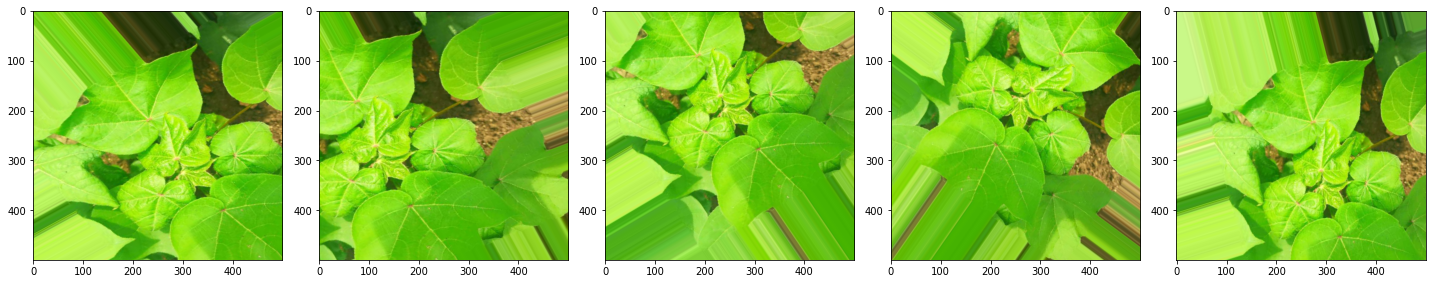

In [64]:
## showing augmented images

images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

In [65]:
# save best model using val accuracy 
from tensorflow.keras import regularizers
model_path = "D:/dataanalysisprojects/cottonplantdisease/cottonplantdiseasebytej/v4_pred_cott_dis.h5"

In [66]:
checkpoint = ModelCheckpoint(model_path,monitor='val_accuracy',verbose=1,save_best_only=True,mode='max')
callbacks_list = [checkpoint]

In [67]:
#Building cnn model
#Building cnn model
cnn_model = tensorflow.keras.models.Sequential([
                                    tensorflow.keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[500,500, 3],kernel_regularizer=regularizers.l2(l=0.01)),
                                    tensorflow.keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    tensorflow.keras.layers.Conv2D(filters=64, kernel_size=3,kernel_regularizer=regularizers.l2(l=0.01)),
                                    tensorflow.keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    tensorflow.keras.layers.Conv2D(filters=128, kernel_size=3,kernel_regularizer=regularizers.l2(l=0.01)),
                                    tensorflow.keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                    tensorflow.keras.layers.Conv2D(filters=256, kernel_size=3,kernel_regularizer=regularizers.l2(l=0.01)),
                                    tensorflow.keras.layers.MaxPooling2D(pool_size=(2,2)),

                                    tensorflow.keras.layers.Dropout(0.5),                                                                        
                                    tensorflow.keras.layers.Flatten(), # neural network beulding
                                    tensorflow.keras.layers.Dense(units=128),
                                    tensorflow.keras.layers.LeakyReLU(alpha=0.3),# input layers
                                    tensorflow.keras.layers.Dropout(0.5),                                    
                                    tensorflow.keras.layers.Dense(units=256),
                                    tensorflow.keras.layers.LeakyReLU(alpha=0.3),                                    
                                    tensorflow.keras.layers.Dropout(0.25),                                    
                                    tensorflow.keras.layers.Dense(units=4, activation='softmax') # output layer
])


# compile cnn model
cnn_model.compile(optimizer = Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [68]:
cnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 498, 498, 32)      896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 249, 249, 32)      0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 247, 247, 64)      18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 123, 123, 64)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 121, 121, 128)     73856     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 60, 60, 128)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 58, 58, 256)      

In [69]:
# train cnn model
history = cnn_model.fit(training_data, 
                          epochs=300, 
                          verbose=1, 
                          validation_data= valid_data,
                          callbacks=callbacks_list) # time start 16.06

loss: 0.3958 - val_accuracy: 0.9568

Epoch 00201: val_accuracy did not improve from 0.98457
Epoch 202/300
61/61 [==============================] - 116s 2s/step - loss: 0.5219 - accuracy: 0.8990 - val_loss: 0.3670 - val_accuracy: 0.9630

Epoch 00202: val_accuracy did not improve from 0.98457
Epoch 203/300
61/61 [==============================] - 116s 2s/step - loss: 0.4640 - accuracy: 0.9258 - val_loss: 0.4230 - val_accuracy: 0.9167

Epoch 00203: val_accuracy did not improve from 0.98457
Epoch 204/300
61/61 [==============================] - 116s 2s/step - loss: 0.5019 - accuracy: 0.9091 - val_loss: 0.3985 - val_accuracy: 0.9599

Epoch 00204: val_accuracy did not improve from 0.98457
Epoch 205/300
61/61 [==============================] - 116s 2s/step - loss: 0.4521 - accuracy: 0.9337 - val_loss: 0.3622 - val_accuracy: 0.9753

Epoch 00205: val_accuracy did not improve from 0.98457
Epoch 206/300
61/61 [==============================] - 117s 2s/step - loss: 0.4635 - accuracy: 0.9214 - val_

In [70]:
model_path2="D:/dataanalysisprojects/cottonplantdisease/cottonplantdiseasebytej/v4_pred_cott_dis.h5"
cnn_model.save(model_path2)

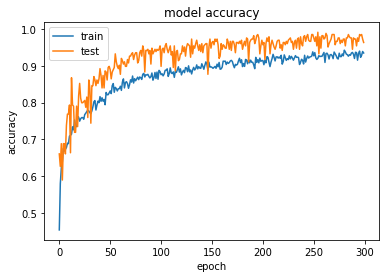

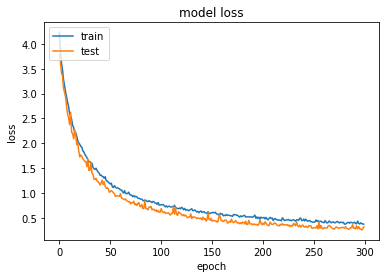

In [71]:
# summarize history by accuracy 

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [72]:
history.history

172,
  0.3869282901287079,
  0.4380890130996704,
  0.39333754777908325,
  0.3808751404285431,
  0.40240469574928284,
  0.3860854506492615,
  0.3818446397781372,
  0.37543752789497375],
 'accuracy': [0.4541260898113251,
  0.5797027349472046,
  0.6227575540542603,
  0.6401845216751099,
  0.6750384569168091,
  0.6683751940727234,
  0.67298823595047,
  0.6776012182235718,
  0.6893900632858276,
  0.6883649230003357,
  0.7088672518730164,
  0.7109174728393555,
  0.7139928340911865,
  0.7339825630187988,
  0.7257816791534424,
  0.7524346709251404,
  0.7355202436447144,
  0.7344951033592224,
  0.7621732354164124,
  0.7601230144500732,
  0.7493593096733093,
  0.756022572517395,
  0.7590978741645813,
  0.7590978741645813,
  0.7544848918914795,
  0.7672988176345825,
  0.7708867192268372,
  0.7754997611045837,
  0.7790876626968384,
  0.7770374417304993,
  0.7724243998527527,
  0.76986163854599,
  0.7770374417304993,
  0.7883136868476868,
  0.8021527528762817,
  0.8052281141281128,
  0.779600203037

In [82]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# dimensions of our images
img_width, img_height = 500,500
model = load_model('v4_pred_cott_dis.h5')

# load the model we saved
#model = load_model('model.h5')
#model.compile(loss='binary_crossentropy',
             # optimizer='rmsprop',
             # metrics=['accuracy'])

# predicting images
img = image.load_img('dis_leaf (322).jpg', target_size=(img_width, img_height))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=1)
print (classes)



[[1. 0. 0. 0.]]


In [79]:
# predicting multiple images at once
img = image.load_img('test2.jpg','test1.jpg','dis_leaf (124).jpg', target_size=(img_width, img_height))
y = image.img_to_array(img)
y = np.expand_dims(y, axis=0)

# pass the list of multiple images np.vstack()
images = np.vstack([x, y])
classes = model.predict(images, batch_size=10)

# print the classes, the images belong to
print (classes)
print (classes[0])
print (classes[0][0])

ValueError: color_mode must be "grayscale", "rgb", or "rgba"